# Property Price Prediction Project



## Problem Objective :
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

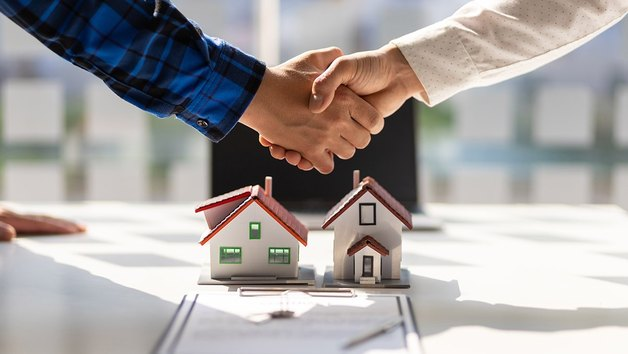

In [1]:
import IPython 
IPython.display.Image('https://na.rdcpix.com/307f0bb1b63fb77c661794a66a6b500aw-c525726921rd-w628_h354_r4_q80.jpg')

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.datasets import fetch_california_housing
warnings.filterwarnings('ignore')
print('Modules Loaded Successfully..!!')

Modules Loaded Successfully..!!


## Step 2: Load Data Create DF

In [3]:
# Internet Required For This Code to Run
data_dict = fetch_california_housing()
data_dict
#data_dict.keys()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(data_dict['target_names'])

['MedHouseVal']


In [6]:
df = pd.DataFrame(data_dict['data'],
                  columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']
print(df)
print('Data Loaded Successfully!!')

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

## Step 3: Understand Data using EDA

In [7]:
# Shape
df.shape

(20640, 9)

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
#checking null values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
# hundreds of thousands of dollars ($100,000) 1lakh Dollar
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
16892,4.4,52.0,6.128852,1.011204,917.0,2.568627,37.58,-122.37,5.0


In [12]:
# All data must be numerical, Dataset contains all values in numerical
# we can porceed this for Analysis

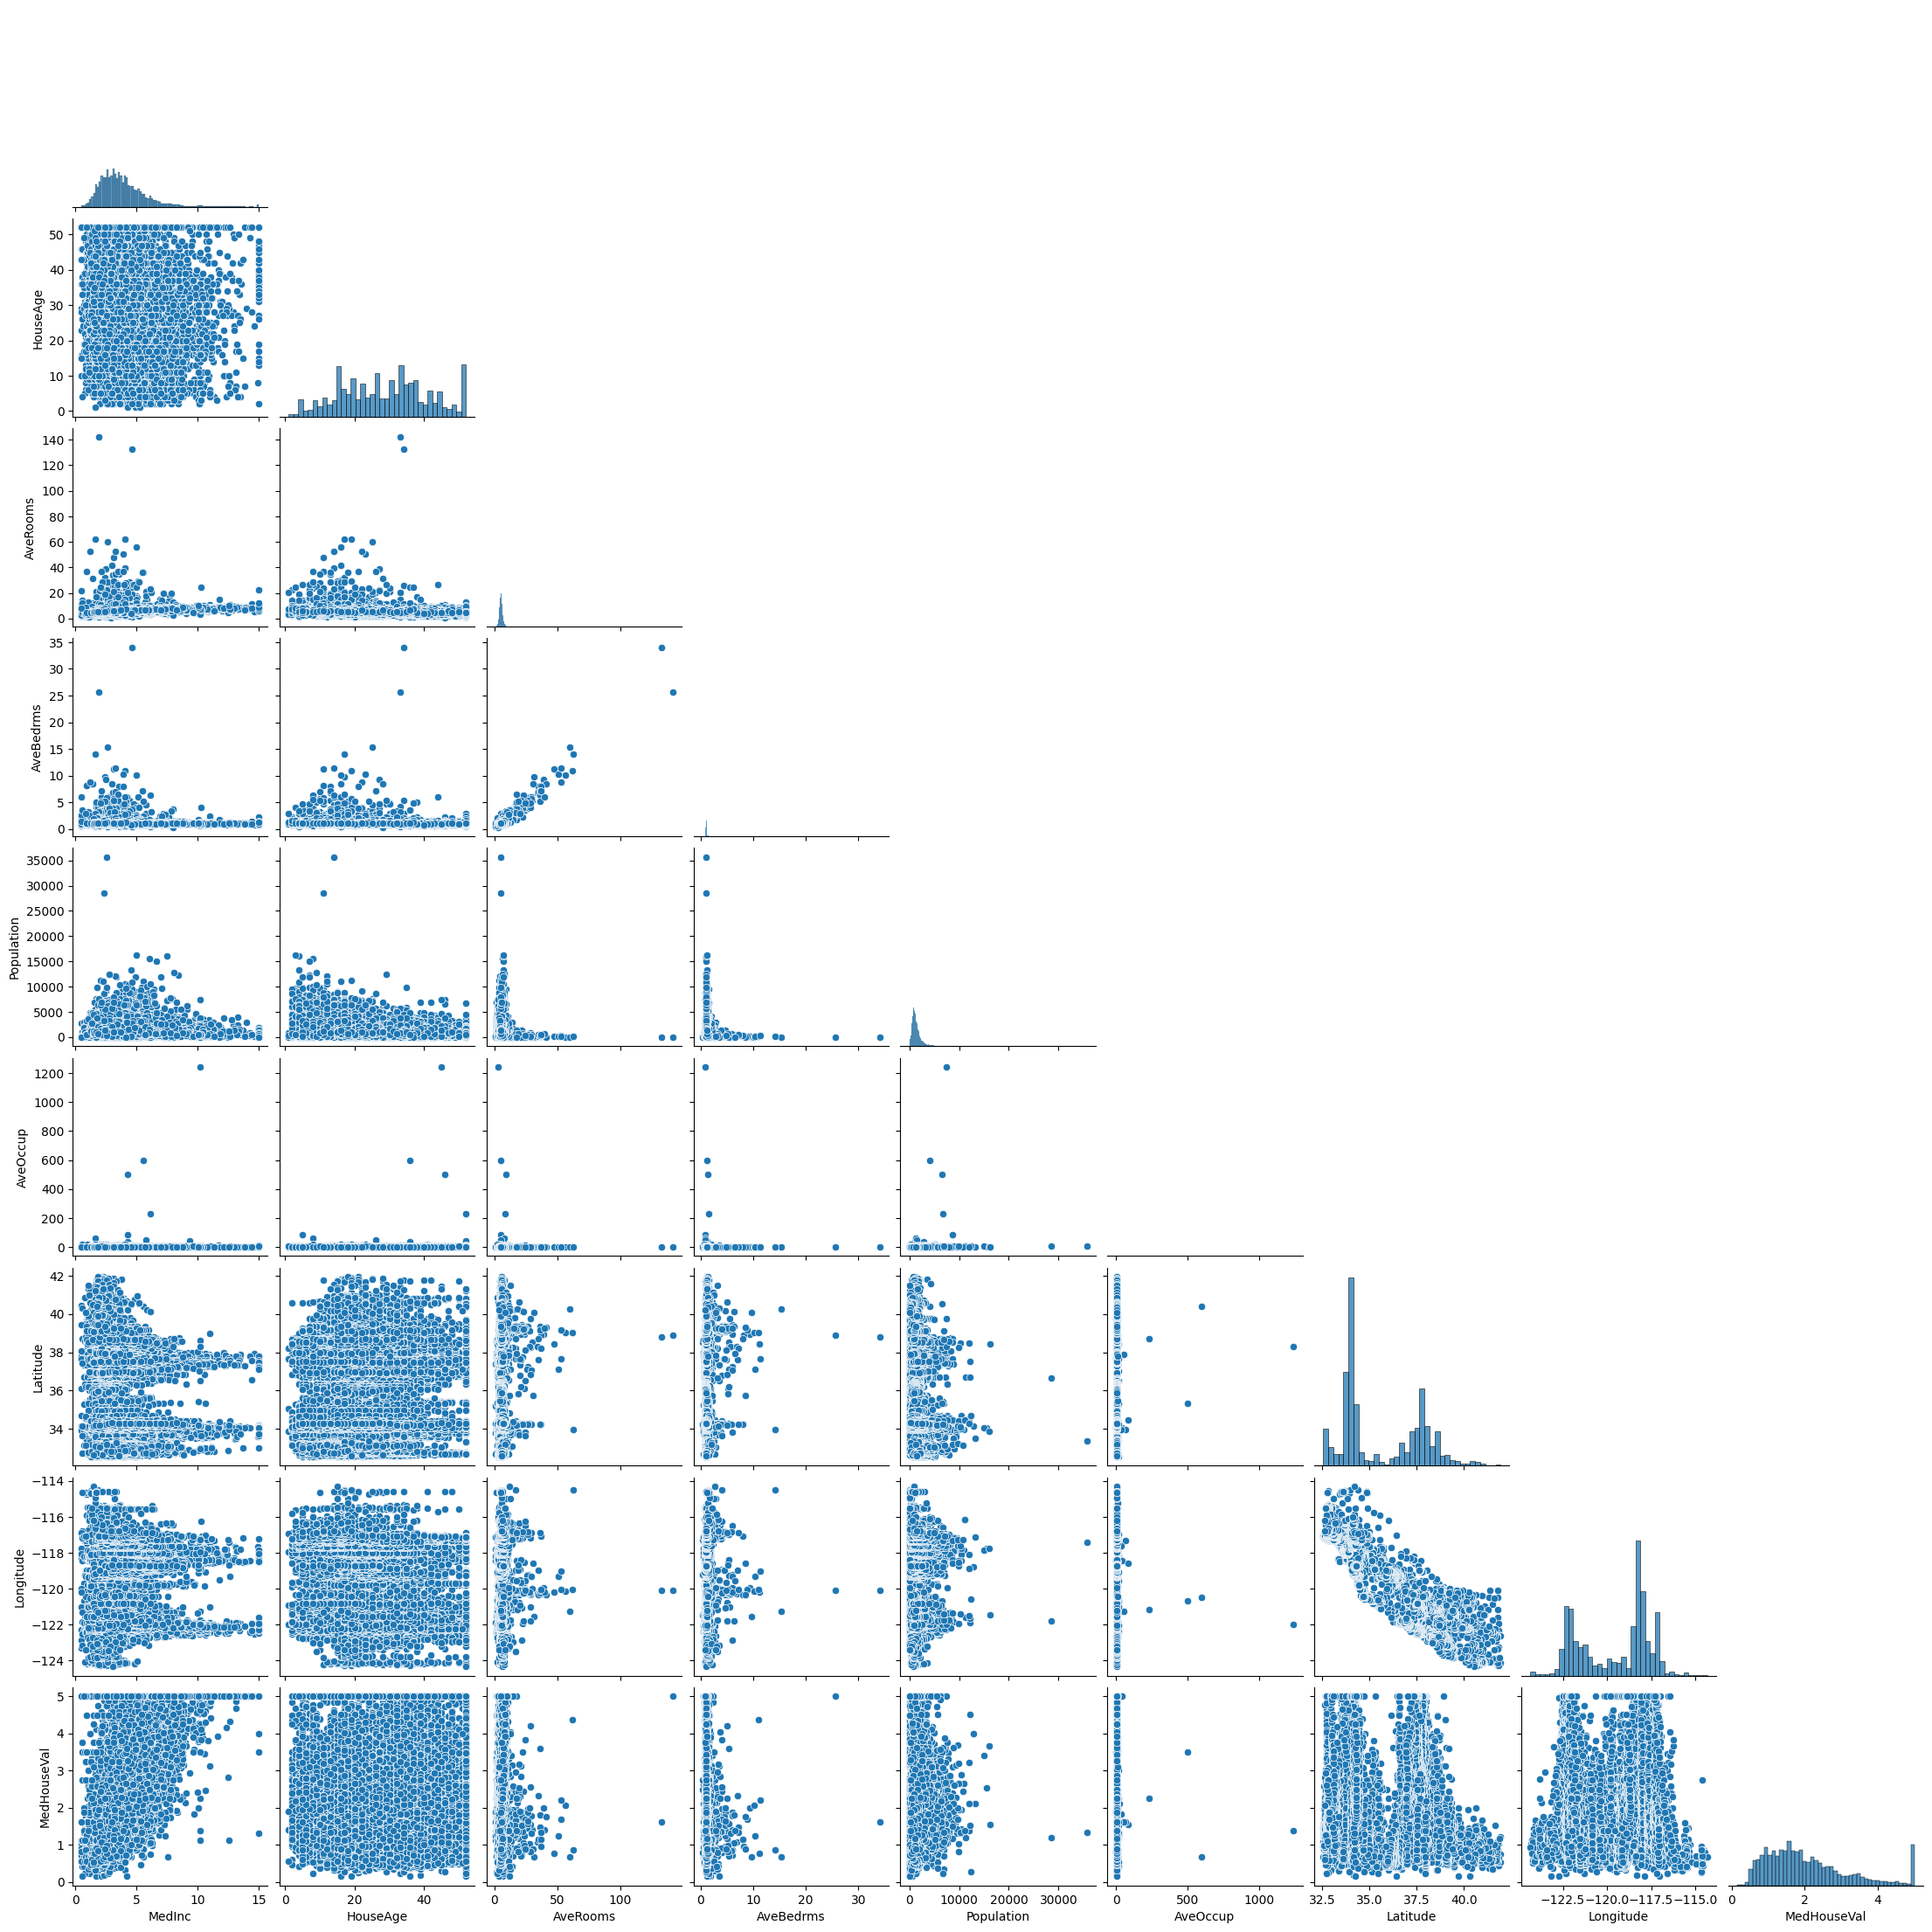

In [13]:
#checking data distribution

sns.pairplot(data = df,corner = True)
plt.show()

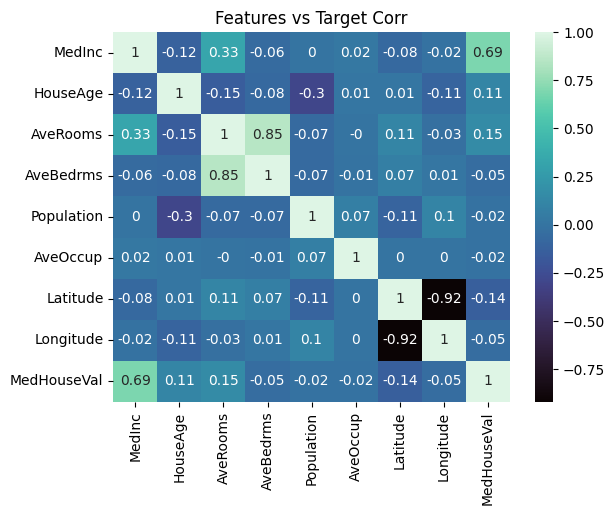

In [14]:
#checking data distribution

plt.title('Features vs Target Corr')
sns.heatmap(df.corr().round(2),annot = True, cmap = 'mako')
plt.show()

In [15]:
# Data Describe
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


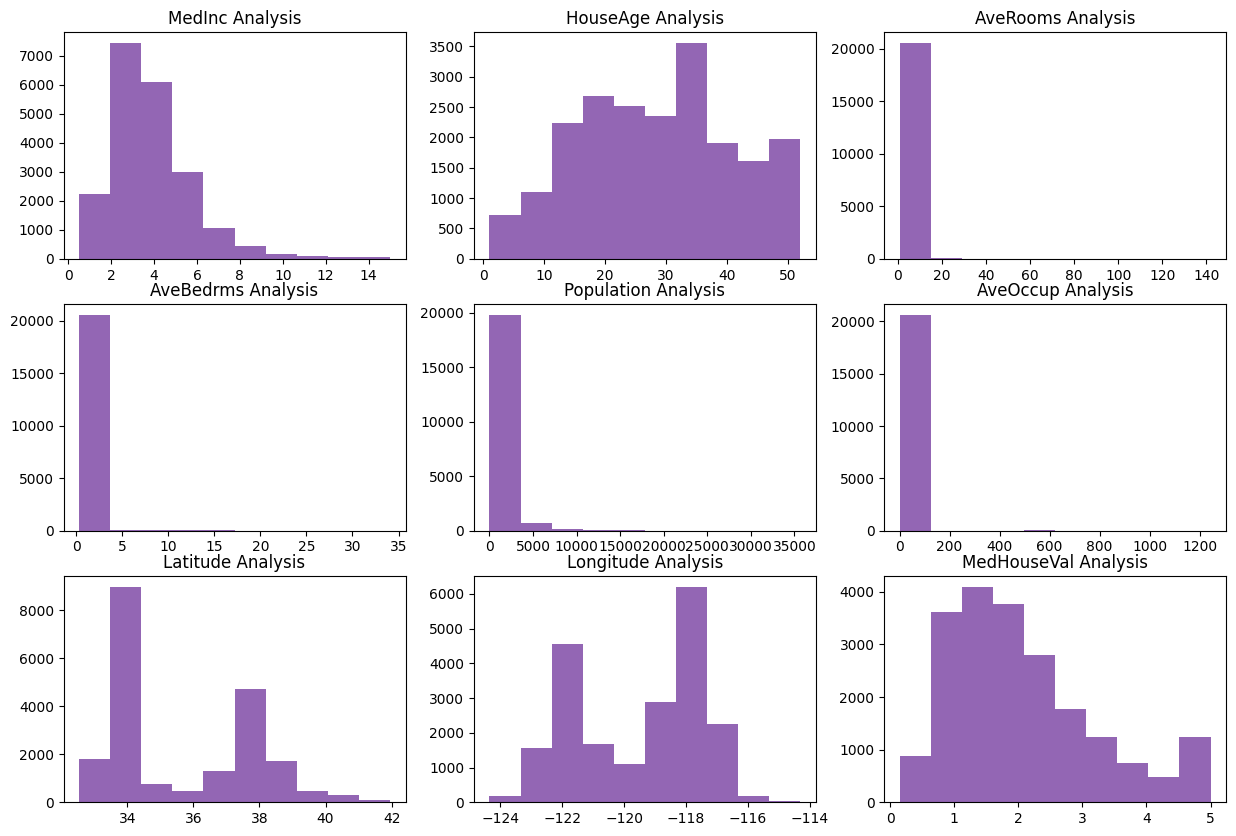

In [16]:
plt.figure(figsize = (15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3, i+1)
    plt.hist(df[j],color = 'indigo', alpha = 0.6)
    plt.title(j + ' Analysis')
plt.show()

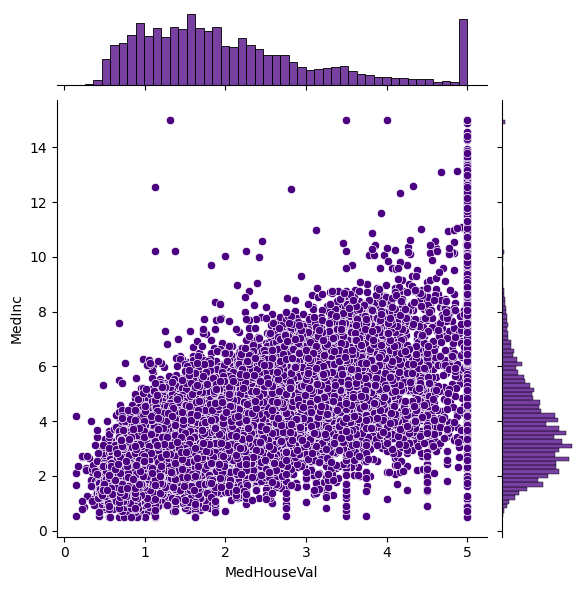

In [17]:
# Distribution of target value Medhousevalue vs MedInc

sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc', color = 'indigo' )
plt.show()

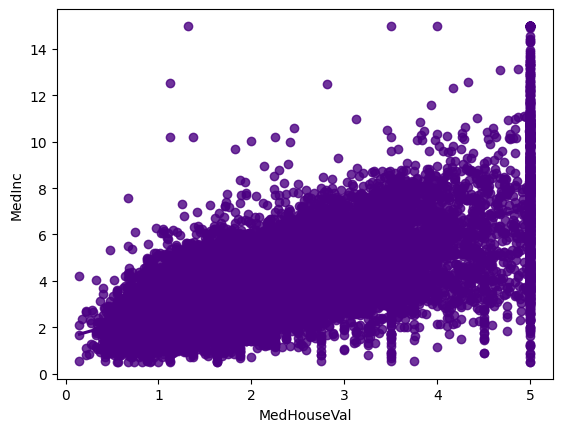

In [18]:

sns.regplot(data = df, x = 'MedHouseVal', y = 'MedInc', color = 'indigo' )
plt.show()

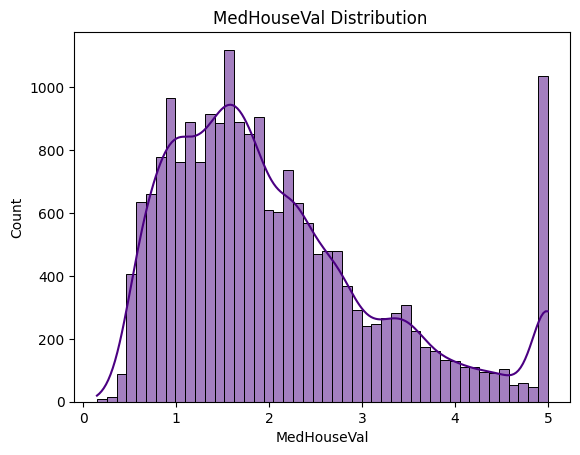

In [19]:
plt.title('MedHouseVal Distribution ')
sns.histplot(data = df, x = 'MedHouseVal',kde = True, color = 'indigo' )
plt.show()

In [20]:
df['MedHouseVal'].describe()
# 75 % of price less than 2.64 lakh dollars

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

## Step 4: Feature Engineering and Preprocessing

In [21]:
# Convert data to Same Scale for Better prediction
# normalization = MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()
scaler.fit(X) # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)

print('Done')


Done


In [22]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


## Step 5: Train Test Split: Split Data for Training and Testing Part

In [23]:
# Train Test Split: Divide into train part-test part
# Train Test Split: Func: divide
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size =.1, random_state = 40)
print('Done')

Done


In [24]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (18576, 8)
Shape of X_test (2064, 8)
Shape of y_train (18576,)
Shape of y_test (2064,)


In [25]:
X_scaled.shape

(20640, 8)

## Step 6: Model Building

### Step 6.1: Linear Model Using Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

#### 6.1.2: Model Prediction

In [27]:
# Test data: X_test

y_pred = lr_model.predict(X_test)
print('Done')

Done


In [28]:
# 20%: Actual answer: y_test, Predicted: y_pred

lr_compare_df = pd.DataFrame({'Actual House Price': y_test,
             'Predicted House Price': y_pred})

print('Done')

Done


In [29]:
lr_compare_df


,Actual House Price,Predicted House Price
6607,2.265,2.003459
884,1.962,2.578220
9457,1.458,1.195450
18681,4.200,1.669156
4654,2.578,2.190437
...,...,...
12250,1.079,0.807976
19925,0.886,1.838266
10159,3.726,3.094822
18683,2.986,2.440592


In [30]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('LR_MAE',lr_mae)

LR_MAE 0.5367090418224933


In [31]:
lr_mse = mean_squared_error(y_test,y_pred)
print('LR_MSE',lr_mse)

LR_MSE 0.5468158842395648


In [32]:
lr_rmse = lr_mse**.5
print('LR_RMSE',lr_rmse)

LR_RMSE 0.73947000225808


In [33]:
# Training Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score', lr_train_score)

# Testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('Testing Score', lr_test_score)

Training Score 0.6064916042887716
Testing Score 0.6010688018946444


In [34]:
# Model Score: apx: 60%,Model not that much good, we good, we need more parameter tuning
# Alternate Model Call: 
# fearture vs Feature high corr(X col:8)


In [35]:
# VIF: Variance Inflation Factor > 10 we can drop that column
# Bais vs Variance Tradeoff: Intersect

# Underfit: Training->Low, Test->Low
# balancefit: Training->Good, Test->Good
# Overfit: Training->High, Test->Low

# Principal Component Analysis (PCA) is a dimensionality reduction technique
# PCA: imp Feature(cols) Find:(8:5 Imp)

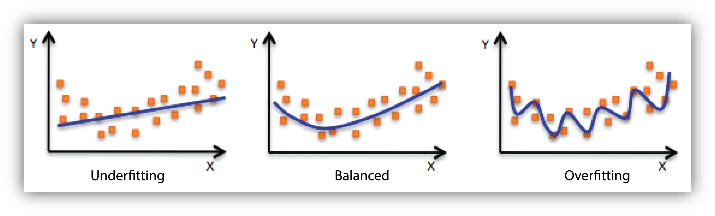

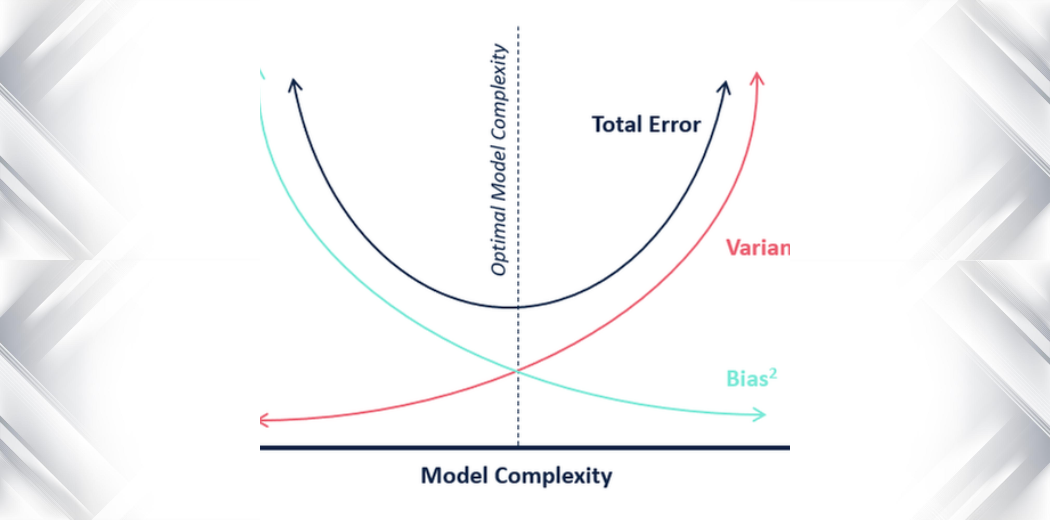 

#### Step 6.1.3: Checking VIF and Drop column if Value VIF>10 

In [36]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3075,0.126791,0.509804,0.016891,0.02006,0.05684,0.002725,0.449522,0.257968


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_df['intercept'] = 1
X_train_df.sample()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
8422,0.19448,0.470588,0.023115,0.020898,0.040136,0.001771,0.141339,0.634462,1


In [38]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range (X_train_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending = False)

# Because Longitude and Latitude has high corr and vif close to 10 we can drop one or both

,Features,VIF factor
8,intercept,176.509327
6,Latitude,9.281591
7,Longitude,8.947967
2,AveRooms,8.648437
3,AveBedrms,7.316189
0,MedInc,2.479214
1,HouseAge,1.234546
4,Population,1.136774
5,AveOccup,1.007843


In [39]:
col = list(X.columns)
col.remove('Latitude')

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
13962,0.295927,0.058824,0.050546,0.026376,0.140615,0.002094,0.692231


In [40]:
def built_model(ml_model, col):
    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]
    
    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]
    
    machine_model = ml_model()
    machine_model.fit(final_X_train, y_train)
    
    model_y_pred = machine_model.predict(final_X_test)
    
    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)
    
    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**5
    model_r2_score = r2_score(y_test,model_y_pred)
    
    model_metrics = {'Model Training Score': model_train_score,
                    'Model Test Score': model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Error':model_r2_score}
    
    model_matrix = pd.DataFrame(model_metrics,index = [1])
    return model_matrix,machine_model

In [41]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [42]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [43]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Error
1,0.539438,0.537848,0.573838,0.633472,0.102009,0.537848


In [44]:
from sklearn.linear_model import Lasso, Ridge

In [45]:
ml_model = Lasso
# Lasso Regression not giving much score, so we can reject this model
built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Error
1,0.0,-0.002724,0.918516,1.374436,4.904819,-0.002724


In [46]:
ml_model = Ridge

built_model(ml_model,col)[0]


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Error
1,0.524011,0.517953,0.594847,0.660742,0.125939,0.517953


In [47]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
    X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state = i,test_size =0.1)
    i+=1
    
    temp_df,final_model = built_model(Ridge,col)
    score = temp_df['Model Test Score'].values[0]
    
    print('Score is:',score)
    if score >= 0.60:
        print('Best random State',i)
        display(temp_df)
        break
        
    display(clear = True)

    

Score is: 0.6067450510265386
Best random State 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Error
1,0.531671,0.606745,0.550302,0.556391,0.053321,0.606745


In [48]:
final_model

Ridge()

## Step 7: Save Model & Extra Objects

In [49]:
import pickle

with open('Property_Price_Prediction_Project.pkl','wb') as f:
    pickle.dump(final_model,f)
    
with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)
    
print('ML Model and Scaller Saved Successfully!!')

ML Model and Scaller Saved Successfully!!


## Step 8: Website Building and Localhost Deployment

In [50]:
# Model : client
#website : Input value: prediction 
#website: python : django , flask fastapi ,   : streamlit
#streamlit : python web based , framework , fast ml model test website
#streamlit= development + deployment (for ml engineers)




In [51]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\prerna dhamija\anaconda3\python.exe -m pip install --upgrade pip


In [52]:
import streamlit as s
print('done')

done


In [53]:
#st.title('California Housing price Prediction ')

In [54]:
# !: Represent run this code in terminal 

In [55]:
!streamlit run house.py

^C


In [56]:
os.getcwd()

'C:\\Users\\prerna dhamija\\Downloads\\gaurav python'

In [57]:
col

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [58]:
df.to_csv('california.csv')
print('done')

done


In [65]:
for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])

    print('min',i,min_value)
    print('max',i,max_value)

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333


In [60]:
for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])

   

# step 9: live deployment using streamlit 

In [70]:
import streamlit as st

In [61]:
#Github :Folder Housing price project
# requirement.txt = we will those modules which is important for app.py to run 

In [69]:
pd.__version__

'2.2.3'

In [71]:
st.__version__

'1.37.1'